# 如何在 Colab 安裝 Darknet 框架訓練 YOLO v3 物件辨識並且最佳化 Colab 的訓練流程

此範例程式碼為文章「如何在 Colab 安裝 Darknet 框架訓練 YOLO v3 物件辨識並且最佳化 Colab 的訓練流程」的範例程式碼。

這篇文章會教你：
* 利用 Colab 128G RAM GPU 來訓練你的 Yolo3 模型
* 將 Colab 設定成可以運用在實際專案的訓練環境
* 快速掛載本機電腦上的檔案到 Colab 環境中
* 事先編譯所有需要的檔案，每次開啟 Colab 後即可立刻進行訓練
* 將訓練好的 weight 檔案自動同步回本機電腦，避免檔案遺失

In [1]:
from google.colab import drive
drive.mount('/content/gdrive') # 請點擊網址，選擇 Google 帳號登入，然後將授權碼貼回輸入框中

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [2]:
%pwd
%ls 
!ln -fs /content/gdrive/My\ Drive /app

darknet*  gdrive/  sample_data/
ln: failed to create symbolic link '/app/My Drive': Invalid argument


## 步驟 4：下載並編譯 Darknet（只需要執行一次）

這個步驟只需要執行一次，執行過程我們會把執行檔複製到 Google Drive。之後要跑程式時，只要把執行檔複製回 Colab 環境就可以使用了。
## 注意： 可以先下載好，
## cudnn-10.0-linux-x64-v7.5.0.56.tgz ==> /app/darknet/cuDNN 
## https://github.com/kriyeng/darknet ==> /app/darknet/darknet_source
## https://pjreddie.com/media/files/yolov3.weights ==> /app/darknet/darknet_source

### 以下分別說明

### 4.1 下載 cuDNN 檔案

1. 申請 Nvidia 帳號，申請網址為 http://bit.ly/2qfpOPj
2. 下載 `cudnn-10.0-linux-x64-v7.5.0.56.tgz`，下載網址為 
下載 cuDNN 檔案。下載網址為：http://bit.ly/2qfpOPj
3. 將下載的檔案 `cudnn-10.0-linux-x64-v7.5.0.56.tgz` 放到 google drive 的 `darknet/cuDNN/` 目錄下。

In [3]:
!tar -xzvf /app/darknet/cuDNN/cudnn-10.0-linux-x64-v7.5.0.56.tgz -C /usr/local/
!chmod a+r /usr/local/cuda/include/cudnn.h

# 檢查是否安裝成功
!cat /usr/local/cuda/include/cudnn.h | grep CUDNN_MAJOR -A 2

cuda/include/cudnn.h
cuda/NVIDIA_SLA_cuDNN_Support.txt
cuda/lib64/libcudnn.so
cuda/lib64/libcudnn.so.7
cuda/lib64/libcudnn.so.7.5.0
cuda/lib64/libcudnn_static.a
#define CUDNN_MAJOR 7
#define CUDNN_MINOR 5
#define CUDNN_PATCHLEVEL 0
--
#define CUDNN_VERSION (CUDNN_MAJOR * 1000 + CUDNN_MINOR * 100 + CUDNN_PATCHLEVEL)

#include "driver_types.h"


### 4.2 下載並編譯 Darknet

In [0]:
%cd /app/darknet 
#!git clone https://github.com/kriyeng/darknet/ darknet_source
%cd darknet_source

# 修改 Darknet 設定，符合 Colab 環境
!sed -i "s/GPU=0/GPU=1/g" Makefile
!sed -i "s/CUDNN=0/CUDNN=1/g" Makefile
!sed -i "s/OPENCV=0/OPENCV=1/g" Makefile

# 編譯
!make 


/content/gdrive/My Drive/darknet
/content/gdrive/My Drive/darknet/darknet_source


# 測試 Darknet 是否正常安裝

我們用 yolo 官方預先訓練好的模型來偵測範例圖片。

In [1]:
%cd /app/darknet/darknet_source
#!wget https://pjreddie.com/media/files/yolov3.weights
!/app/darknet/darknet_source/darknet detect cfg/yolov3.cfg yolov3.weights data/person.jpg --dont_show

/content/gdrive/My Drive/darknet/darknet_source
layer     filters    size              input                output
   0 conv     32  3 x 3 / 1   416 x 416 x   3   ->   416 x 416 x  32 0.299 BF
   1 conv     64  3 x 3 / 2   416 x 416 x  32   ->   208 x 208 x  64 1.595 BF
   2 conv     32  1 x 1 / 1   208 x 208 x  64   ->   208 x 208 x  32 0.177 BF
   3 conv     64  3 x 3 / 1   208 x 208 x  32   ->   208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1
   5 conv    128  3 x 3 / 2   208 x 208 x  64   ->   104 x 104 x 128 1.595 BF
   6 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
   7 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
   8 Shortcut Layer: 5
   9 conv     64  1 x 1 / 1   104 x 104 x 128   ->   104 x 104 x  64 0.177 BF
  10 conv    128  3 x 3 / 1   104 x 104 x  64   ->   104 x 104 x 128 1.595 BF
  11 Shortcut Layer: 8
  12 conv    256  3 x 3 / 2   104 x 104 x 128   ->    52 x  52 x 256 1.595 BF
  13 conv    128  1 x 1 / 1    52 x 

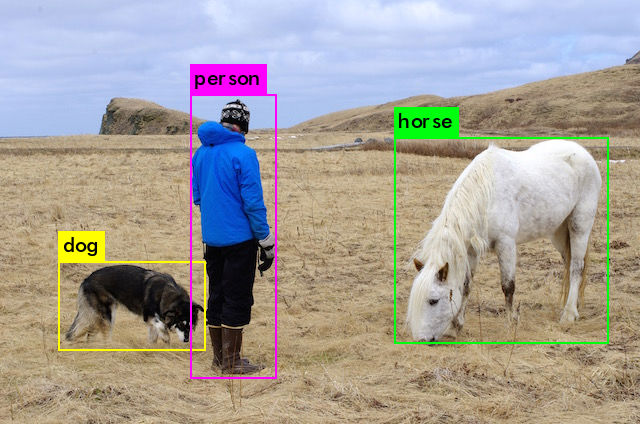

In [2]:
import cv2
from google.colab.patches import cv2_imshow
img = cv2.imread('predictions.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)